# 4. Beyond MatPlotLib

### Let's learn how to: 
    1. Make plots with Seaborn (building on MatPlotLib)
    2. Use plotly to make interactive data viz
    3. Produce wordclouds and venn diagrams

## Make plots with Seaborn

In [16]:
## install seaborn
# !{sys.executable} -m pip install seaborn

## import our packages
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [17]:
## Load our sample dataset about tips at a restaurant
tips = sns.load_dataset("tips")

## View the dataset
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [18]:
## using premade styles

sns.set_style('dark')

## try out the preset styles: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
## the default is 'darkgrid'

<Axes: xlabel='total_bill', ylabel='tip'>

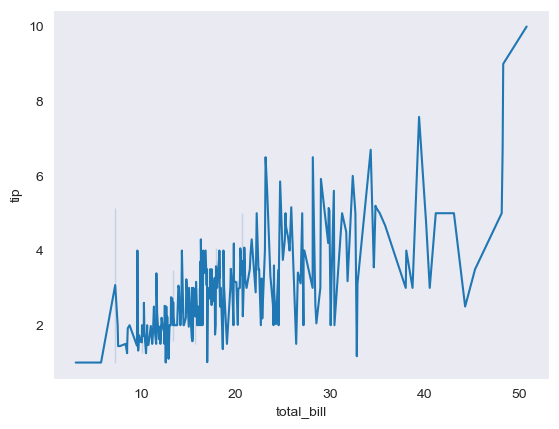

In [19]:
## Make a simple line plot of tip amount vs total bill

sns.lineplot(data=tips,         ## choose our dataset
             x='total_bill',    ## define our x variable
             y='tip')           ## define our y variable

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

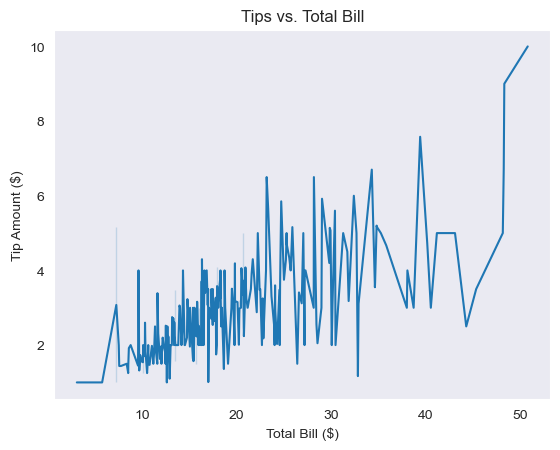

In [20]:
## Add a title and axes labels using the set. function
tipgraph = sns.lineplot(data=tips,
             x='total_bill',
             y='tip')

tipgraph.set(title='Tips vs. Total Bill', 
             xlabel='Total Bill ($)', 
             ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

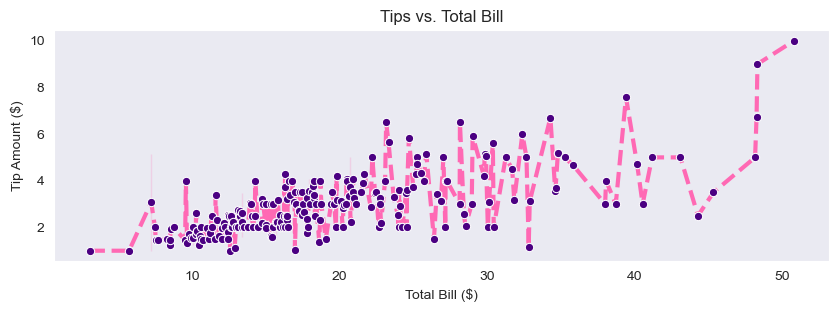

In [21]:
## we can modify aesthetic elements similar to how we did with matplotlib

## Use the subplots function to change figure size
## (remember, seaborn works on top of matplotlib)
fig = plt.subplots(figsize=(10, 3))

## Add aesthetic arguments for markers, colours, and line style
tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
                        y='tip', 
                        color = 'hotpink', 
                        linestyle = '--', 
                        linewidth = 3, 
                        marker = 'o',
                        markerfacecolor = 'indigo')

tipgraph.set(title='Tips vs. Total Bill', 
             xlabel='Total Bill ($)', 
             ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

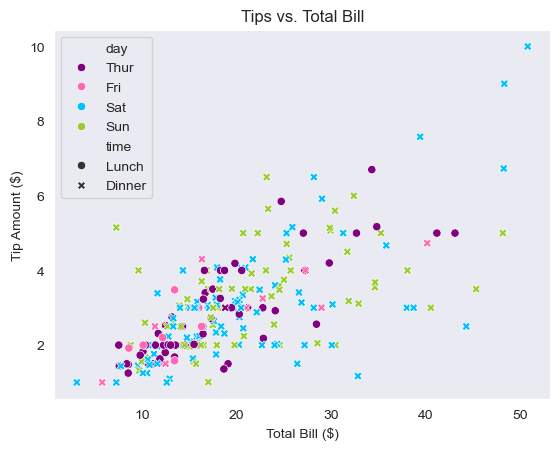

In [22]:
## Let's get into why seaborn is an improvement

## Where seaborn becomes very useful is in easily adding multiple variables to our plots

tipgraph = sns.scatterplot(data=tips,               ## this time let's make a scatterplot
                        x='total_bill',
                        y='tip',
                        style = 'time',             ## change marker type according to time (dinner, lunch)
                        hue = 'day',                ## change marker colour according to day
                        palette = ['purple', 'hotpink', 'deepskyblue', 'yellowgreen']) ## define our colour palette

tipgraph.set(title='Tips vs. Total Bill', 
             xlabel='Total Bill ($)', 
             ylabel='Tip Amount ($)')


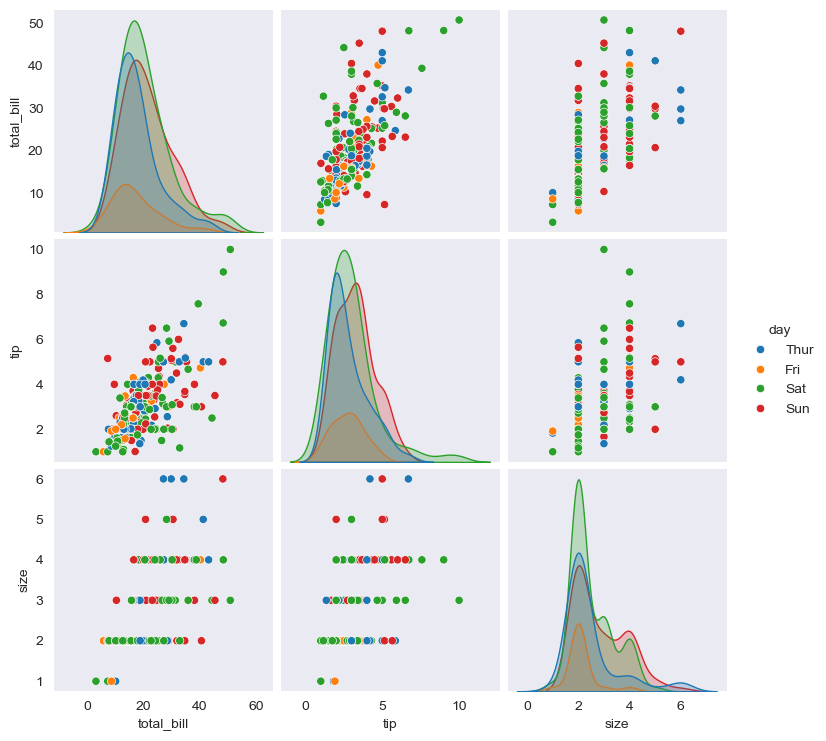

In [23]:
## Use pairplot to explore multidimensional relationships 

sns.pairplot(data = tips,hue = 'day')

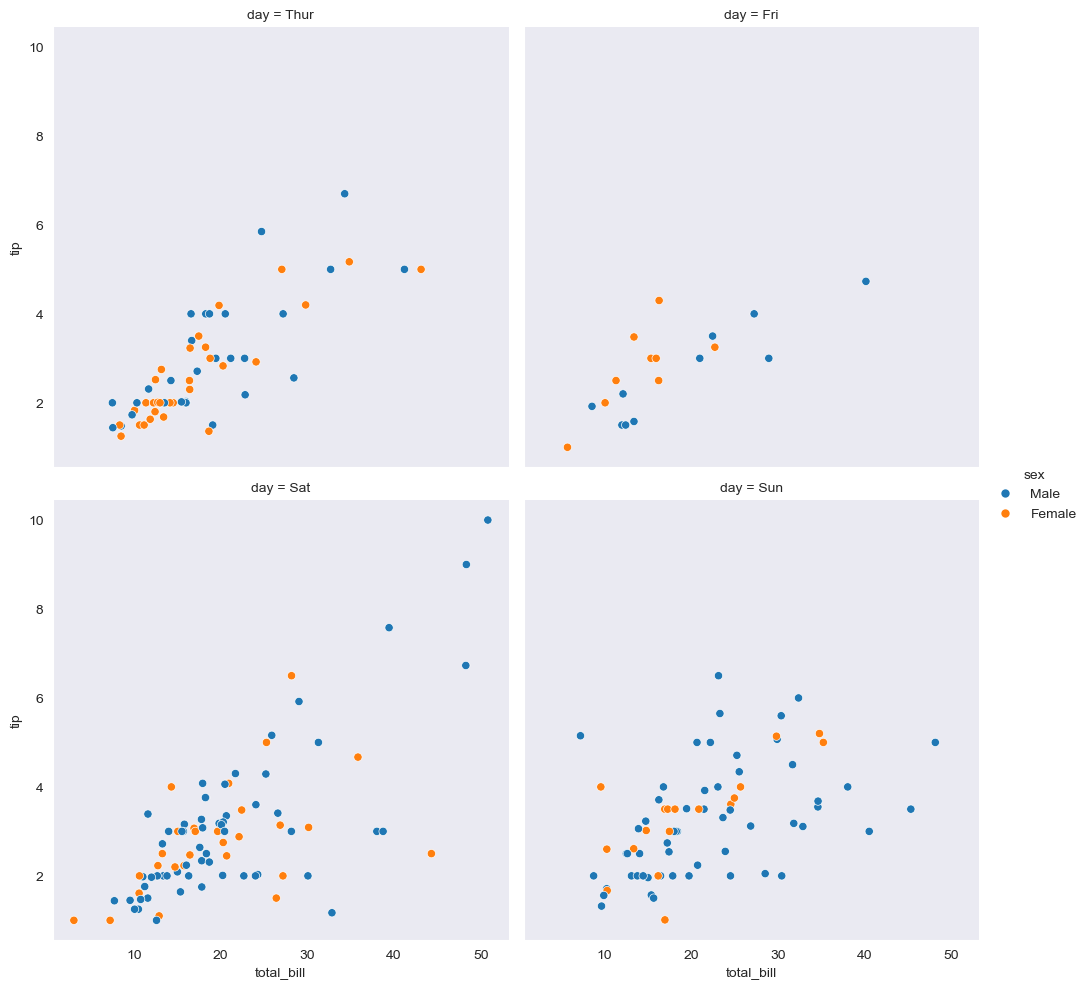

In [24]:
## Use relational plots (relplots) to compare variables

daysplot = sns.relplot(
    data=tips,
    x="total_bill", 
    y="tip",
    hue="sex", 
    col="day",          ## create a faceted figure with subplots in columns arranged by this variable
    kind="scatter",     ## what kind of plot to make (try 'line')
    col_wrap=2)

## Use Plotly to make Interactive Plots

In [25]:
## first import our package

import plotly.graph_objects as go   ## 'go' is 'graph objects'

In [26]:
## Make our data
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [27]:
## now we'll make our plot 
## plotly syntax is a little different from matplotlib/seaborn, but still intuitive with that as our base

## first we make our figure
graph = go.Figure()

## choose our plot type (bar) and identify our data
graph.add_trace(go.Bar(x=x1, y=y1))

## now update our plot
graph.update_layout(
  title="Pirate Scores", 
  xaxis_title="Pirates", 
  yaxis_title="Score")

## and show our plot
graph.show()


In [28]:
## we can save these plotly interactive graphs as html files and embed them!

# graph.write_html("pirategraph.html")

In [29]:
## just like with matplotlib and seaborn, we can customize visual elements of our plots

## make our empty figure again
graph = go.Figure()

## let's make a scatter plot this time
graph.add_trace(go.Scatter( 
    x=x1,
    y=y1,
    mode='markers', ## we want points for a scatter plot
    marker=dict(
        size=15, ## point size
        color='hotpink', ## point colour
        opacity=1, ## point transparency/alpha
        line=dict(width=5, color='purple') ## point outline
    )
))

## now customize titles and image size
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, ## size in pixels
    height=500
)

## Qualitative Viz

In [30]:
## let's make wordclouds

## install and load packages
# import sys
# !{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
## we'll also be using pandas and matplotlib

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
## load a sample text dataset of movie quotes 
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
                on_bad_lines='skip')

df


,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


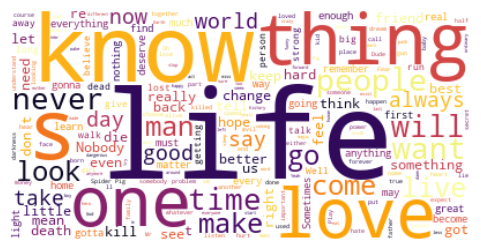

In [ ]:
## let's make a simple word cloud using our 'quote' column

## join all our text from each row from our quote column into a string
text = " ".join(each for each in df.quote)

## generate our wordcloud image
wordcloud = WordCloud(background_color="white",
                     colormap = 'inferno').generate(text)

## use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud,                    ## remember 'imshow' from when we added pictures to our matplotlib axes
          interpolation='bilinear')     ## this line just helps our image look smoother
ax.axis("off")
plt.show()


In [ ]:
## we can also make venn diagrams reproducibly!
## this is easy using matplotlib

## load packages
!pip install matplotlib-venn
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=1aa7f1c42b45d87a34b2a41759ca83e37299d057cec6bde9485d11d211047a63
  Stored in directory: /home/jovyan/.cache/pip/wheels/f6/80/48/193eff32ed8e176623b15874055438ecec522ba68ed05abee6
Successfully built matplotlib-venn


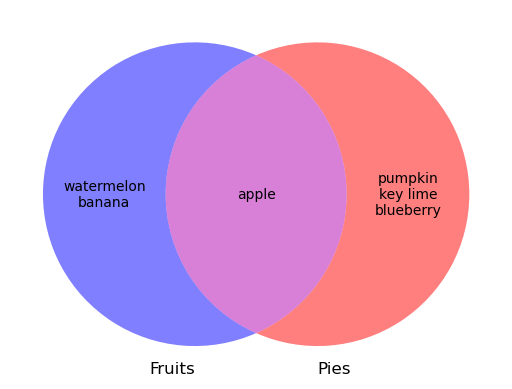

In [ ]:
## define our sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

## assign our sets to each circle and modify appearance
diagram = venn2_unweighted([A, B],
      set_labels = ('Fruits', 'Pies'), 
      set_colors=("blue", "red"),
      alpha=0.5)

## assign the text content of each circle
## the numbers as arguments to the get_label_by_id function are from the docs from the package (https://github.com/konstantint/matplotlib-venn/blob/master/matplotlib_venn/_common.py#L12)
diagram.get_label_by_id("10").set_text("\n".join(A - B)) #left
diagram.get_label_by_id("11").set_text("\n".join(A & B)) #middle
diagram.get_label_by_id("01").set_text("\n".join(B - A)) #right

## show our image
plt.show()
